**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("RELIANCE.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175
1,2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805
2,2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435
3,2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036
4,2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293


In [3]:
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.index = df['Date']
df = df.drop(['Date'],axis=1)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293


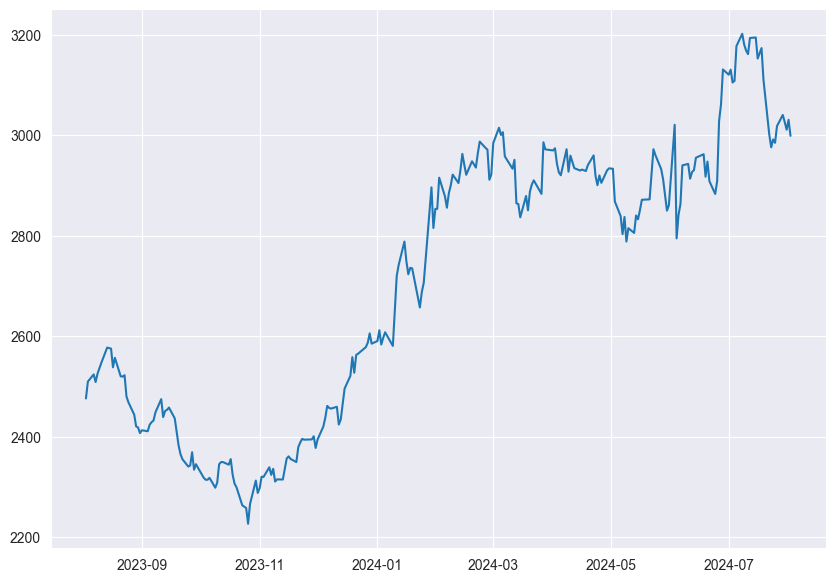

In [6]:
plt.figure(figsize=(10,7))
plt.plot(df['Close'],label='Closing prise')

In [7]:
df['open-close']=df.Open-df.Close  
df['high-low']=df.High-df.Low
#this is for if open>close than value +ve otherwise open<close value -ve

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low
Date,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902


In [9]:
x=df[['open-close','high-low']]
y=np.where(df['Close'].shift(-1)>df['Close'],1,0)
#np.where function is used here to create a new array
#df['Close'].shift(-1): This shifts the 'Close' column by one position up. Each element in this shifted series is the next day's closing price.
#np.where(condition, x, y): returns an array where elements are taken from x if condition is True, otherwise from y
#1 indicate next days closing price is high buy the stock
#0 indicate next days cloding price is low not buy

Split Data into Train and Test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
y_train

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Import Models**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
models = {
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [15]:
results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    results[name]=accuracy
    print(f'{name}: {accuracy:.2f}')

Support Vector Machine: 0.57
Random Forest: 0.55
Logistic Regression: 0.59


**Use model which accuracy is high**

In [16]:
best_model=max(results,key=results.get)
best_model

'Logistic Regression'

In [17]:
best_models=models[best_model]
best_models

LogisticRegression()

In [18]:
df['predicted_signals']=best_models.predict(sc.transform(x))
df['predicted_signals']

Date
2023-08-03    1
2023-08-04    1
2023-08-07    1
2023-08-08    1
2023-08-09    1
             ..
2024-07-29    0
2024-07-30    1
2024-07-31    1
2024-08-01    1
2024-08-02    1
Name: predicted_signals, Length: 244, dtype: int32

In [19]:
model_pred=best_models.predict(x_test)
actual_pred=pd.DataFrame({'actual data':y_test,'Predicted data':model_pred})

In [20]:
actual_pred.head()

,actual data,Predicted data
0,1,0
1,0,0
2,1,1
3,0,1
4,1,1


In [21]:
unique, counts = np.unique('predicted_signals', return_counts=True)
print(dict(zip(unique, counts)))

{'predicted_signals': 1}


In [22]:
# cls = LogisticRegression().fit(x_train, y_train)
# lpred=model.predict(x_test)
# laccuracy=accuracy_score(y_test,lpred)
# laccuracy

In [23]:
# cls.predict(x)

In [24]:
best_models.predict(x)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1])

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signals
Date,,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853,1
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902,1
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902,1
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902,1
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902,1


**For Predict Buy or Sale**

In [26]:
#Open=2521 Close=2523.85 High=2528.40 Low=2505
#pass Open-Close,High-Low
input_data = np.array([[-2.85, 23.4]])

# scaled_input = sc.transform(input_data)

prediction = best_models.predict(input_data)

if(prediction==1):
    print("Prediction: Buy")
else:
    print("Prediction: Sale")

Prediction: Buy


**Predict Direction plot the graph**

In [27]:
df['Return']=df.Close.pct_change()
#daily change in close

In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signals,Return
Date,,,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853,1,NaN
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902,1,0.013591
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902,1,0.005698
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902,1,-0.006023
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902,1,0.006597


In [29]:
df['daily strategy']=df.Return*df.predicted_signals.shift(1)

In [30]:
df.head(8)

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signals,Return,daily strategy
Date,,,,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853,1,NaN,NaN
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902,1,0.013591,0.013591
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902,1,0.005698,0.005698
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902,1,-0.006023,-0.006023
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902,1,0.006597,0.006597
2023-08-10,2524.949951,2550.000000,2508.449951,2536.449951,2527.521729,7735299,-11.500000,41.550049,1,0.004455,0.004455
2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2538.183838,11089665,-14.699951,46.500000,1,0.004218,0.004218
2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2568.177979,4787906,-38.250000,57.300049,0,0.011817,0.011817


In [31]:
df['Cumulutive_Ret'] = df['Return'].cumsum() 
df.head(8)

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signals,Return,daily strategy,Cumulutive_Ret
Date,,,,,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853,1,NaN,NaN,NaN
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902,1,0.013591,0.013591,0.013591
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902,1,0.005698,0.005698,0.019289
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902,1,-0.006023,-0.006023,0.013267
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902,1,0.006597,0.006597,0.019864
2023-08-10,2524.949951,2550.000000,2508.449951,2536.449951,2527.521729,7735299,-11.500000,41.550049,1,0.004455,0.004455,0.024319
2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2538.183838,11089665,-14.699951,46.500000,1,0.004218,0.004218,0.028537
2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2568.177979,4787906,-38.250000,57.300049,0,0.011817,0.011817,0.040355


In [32]:
df['Cumulutive_Strategy'] = df['daily strategy'].cumsum() 
df.head(8)

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low,predicted_signals,Return,daily strategy,Cumulutive_Ret,Cumulutive_Strategy
Date,,,,,,,,,,,,,
2023-08-03,2475.300049,2500.899902,2458.050049,2475.899902,2467.184814,5084175,-0.599853,42.849853,1,NaN,NaN,NaN,NaN
2023-08-04,2498.800049,2516.000000,2471.600098,2509.550049,2500.716309,11442805,-10.750000,44.399902,1,0.013591,0.013591,0.013591,0.013591
2023-08-07,2521.000000,2528.399902,2505.000000,2523.850098,2514.966064,2991435,-2.850098,23.399902,1,0.005698,0.005698,0.019289,0.019289
2023-08-08,2528.000000,2534.449951,2499.550049,2508.649902,2499.819336,4922036,19.350098,34.899902,1,-0.006023,-0.006023,0.013267,0.013267
2023-08-09,2504.850098,2529.000000,2481.100098,2525.199951,2516.311279,5743293,-20.349853,47.899902,1,0.006597,0.006597,0.019864,0.019864
2023-08-10,2524.949951,2550.000000,2508.449951,2536.449951,2527.521729,7735299,-11.500000,41.550049,1,0.004455,0.004455,0.024319,0.024319
2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2538.183838,11089665,-14.699951,46.500000,1,0.004218,0.004218,0.028537,0.028537
2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2568.177979,4787906,-38.250000,57.300049,0,0.011817,0.011817,0.040355,0.040355


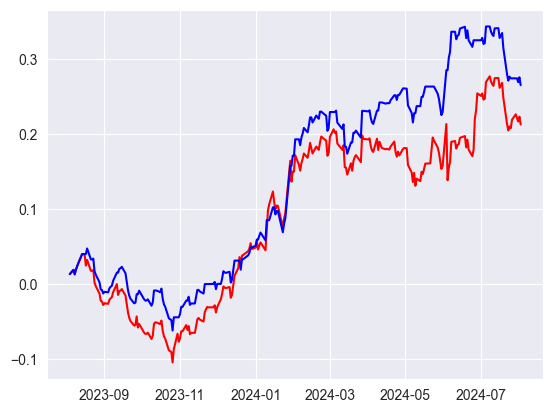

In [33]:
plt.plot(df['Cumulutive_Ret'],color='red') 
plt.plot(df['Cumulutive_Strategy'],color='blue')

In [34]:
best_models.predict([[-0.599,42.84]])

array([1])

**For Predict Buy or Sale**

In [38]:
#Open=2521 Close=2523.85 High=2528.40 Low=2505
#pass Open-Close,High-Low
open_value = float(input("Open value: "))
close_value = float(input("Close value: "))
high_value = float(input("High value: "))
low_value = float(input("Low value: "))

open_close_diff = open_value - close_value
high_low_diff = high_value - low_value

input_data = np.array([[open_close_diff, high_low_diff]])

# scaled_input = sc.transform(input_data)

prediction = best_models.predict(input_data)

if(prediction==1):
    print("Prediction: Buy")
else:
    print("Prediction: Sale")

Open value:  2521
Close value:  2523
High value:  2520
Low value:  2502


Prediction: Buy
